<a href="https://colab.research.google.com/github/2403a52270-commits/nlp/blob/main/NLP_LAB_4_2403a52270.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='warn')
df.head()

/tmp/ipython-input-4031879477.py:1: ParserWarning: Skipping line 33245: unexpected end of data

  df = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='warn')


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
positive_reviews = df[df['sentiment'] == 'positive']['review']
negative_reviews = df[df['sentiment'] == 'negative']['review']

print("Positive reviews:", len(positive_reviews))
print("Negative reviews:", len(negative_reviews))


Positive reviews: 16612
Negative reviews: 16631


In [ ]:
vectorizer = TfidfVectorizer(
    stop_words=stop_words,
    lowercase=True,
    max_features=5000
)


In [ ]:
tfidf_pos = vectorizer.fit_transform(positive_reviews)
pos_terms = vectorizer.get_feature_names_out()

pos_scores = np.mean(tfidf_pos.toarray(), axis=0)

pos_df = pd.DataFrame({
    'Term': pos_terms,
    'TF-IDF Score': pos_scores
}).sort_values(by='TF-IDF Score', ascending=False)

top_pos = pos_df.head(15)
top_pos


,Term,TF-IDF Score
559,br,0.105321
2944,movie,0.052907
1736,film,0.049962
3128,one,0.031981
2615,like,0.025346
1958,good,0.024789
1989,great,0.023014
4251,story,0.021323
3904,see,0.020893
4870,well,0.020449


In [ ]:
tfidf_neg = vectorizer.fit_transform(negative_reviews)
neg_terms = vectorizer.get_feature_names_out()

neg_scores = np.mean(tfidf_neg.toarray(), axis=0)

neg_df = pd.DataFrame({
    'Term': neg_terms,
    'TF-IDF Score': neg_scores
}).sort_values(by='TF-IDF Score', ascending=False)

top_neg = neg_df.head(15)
top_neg


,Term,TF-IDF Score
559,br,0.113646
2947,movie,0.061335
1735,film,0.047273
3127,one,0.032249
2618,like,0.029394
381,bad,0.026102
1956,good,0.023965
1545,even,0.023261
4960,would,0.022064
3573,really,0.021193


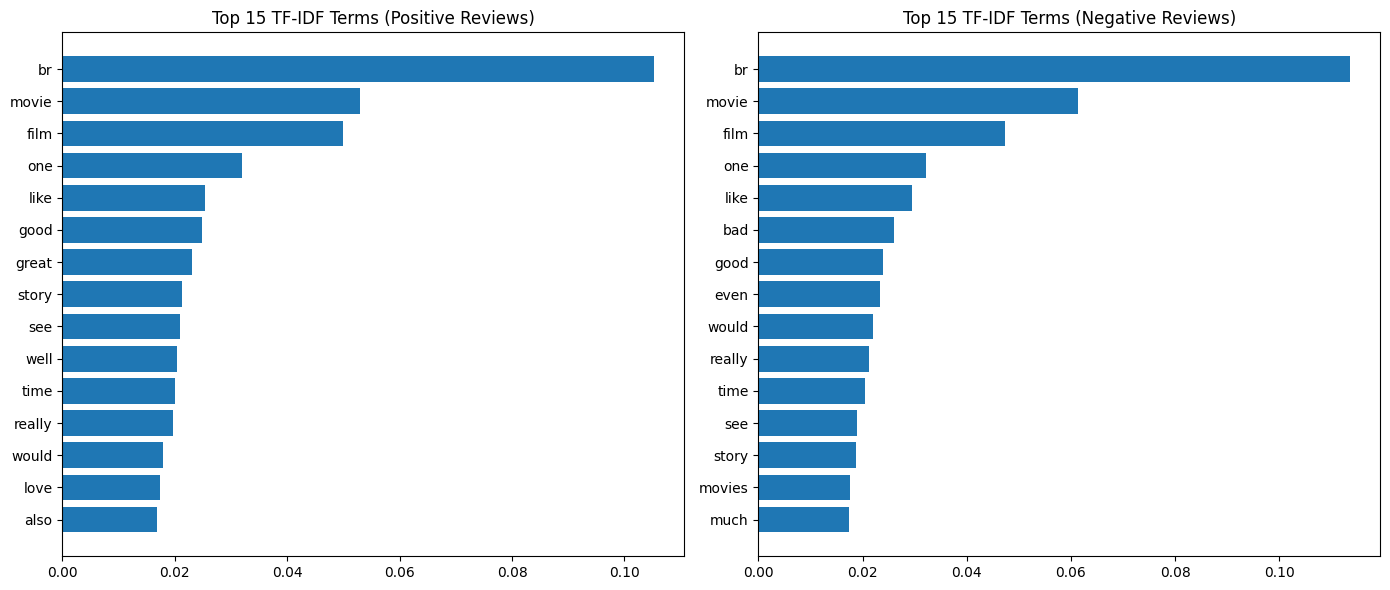

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.barh(top_pos['Term'], top_pos['TF-IDF Score'])
plt.title("Top 15 TF-IDF Terms (Positive Reviews)")
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.barh(top_neg['Term'], top_neg['TF-IDF Score'])
plt.title("Top 15 TF-IDF Terms (Negative Reviews)")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
